In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Extraindo os dados

In [8]:
level_sensor_column_name = '.........Data e Hora..........Nível (cm)'
rain_sensor_column_name = '.........Data e Hora..........Chuva (mm)'

In [9]:
def get_df_from_txt(filename, header, target):
    df = pd.read_table(filename)
    df_info = df[header].str.split('                 ')
    df['data'] = df_info.str.get(0).transform(lambda x: x.strip())
    df[target] = df_info.str.get(1)
    df[target] = pd.to_numeric(df[target], errors='coerce').astype('Float64')
    df.drop(header, inplace=True, axis=1)
    return df

In [10]:
# Taió
rain_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-chuva.txt', rain_sensor_column_name, 'rain_taio')
river_level_taio = get_df_from_txt('83050000TAIÓ_2962005-1442014-nível.txt', level_sensor_column_name, 'river_level_taio')

In [11]:
# Ituporanga
rain_ituporanga = get_df_from_txt('83250000ITUPORANGA_3172005-1442014-chuva.txt', rain_sensor_column_name, 'rain_ituporanga')
river_level_ituporanga = get_df_from_txt('83250000ITUPORANGA_2962005-1032014-nível.txt', level_sensor_column_name, 'river_level_ituporanga')

In [12]:
# Rio do Sul
river_level_rio_do_sul = get_df_from_txt('83300200RIODOSUL-NOVO_2982005-1422014 -nível.txt', level_sensor_column_name, 'river_level_rio_do_sul')

In [13]:
df = pd.merge(rain_taio, river_level_taio, how = 'outer')
df = pd.merge(df, rain_ituporanga, how = 'outer')
df = pd.merge(df, river_level_ituporanga, how = 'outer')
df = pd.merge(df, river_level_rio_do_sul, how = 'outer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138231 entries, 0 to 138230
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data                    138231 non-null  object 
 1   rain_taio               122983 non-null  Float64
 2   river_level_taio        107276 non-null  Float64
 3   rain_ituporanga         114151 non-null  Float64
 4   river_level_ituporanga  83710 non-null   Float64
 5   river_level_rio_do_sul  116938 non-null  Float64
dtypes: Float64(5), object(1)
memory usage: 8.0+ MB


In [94]:
df.head(30)

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
678,31/07/2005 21:00:00,0.0,98.0,3.0,30.0,171.0
679,31/07/2005 22:00:00,0.0,98.0,12.0,39.0,171.0
680,31/07/2005 23:00:00,0.0,97.0,19.0,59.0,171.0
681,01/08/2005 00:00:00,0.0,97.0,5.0,82.0,170.0
684,01/08/2005 03:00:00,0.0,97.0,1.0,27.0,170.0
686,01/08/2005 05:00:00,0.0,97.0,1.0,27.0,169.0
688,01/08/2005 07:00:00,0.0,96.0,1.0,27.0,169.0
689,01/08/2005 08:00:00,0.0,96.0,2.0,30.0,168.0
690,01/08/2005 09:00:00,0.0,96.0,12.0,39.0,169.0
691,01/08/2005 10:00:00,0.0,95.0,19.0,59.0,168.0


## Limpando os dados

Linhas contendo qualquer valor nulo em uma ou mais colunas são removidas

In [81]:
df = df.dropna(how='any')  
df.reset_index(drop = True)

,data,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
0,31/07/2005 21:00:00,0.0,98.0,3.0,30.0,171.0
1,31/07/2005 22:00:00,0.0,98.0,12.0,39.0,171.0
2,31/07/2005 23:00:00,0.0,97.0,19.0,59.0,171.0
3,01/08/2005 00:00:00,0.0,97.0,5.0,82.0,170.0
4,01/08/2005 03:00:00,0.0,97.0,1.0,27.0,170.0
...,...,...,...,...,...,...
66957,24/02/2014 15:30:00,0.0,142.0,0.0,87.0,174.0
66958,25/02/2014 01:15:00,0.0,152.0,0.0,54.0,180.0
66959,25/02/2014 01:45:00,0.0,152.0,0.0,54.0,179.0
66960,25/02/2014 02:30:00,0.0,151.0,0.0,54.0,178.0


In [82]:
df.corr()

/tmp/ipykernel_6871/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rain_taio,river_level_taio,rain_ituporanga,river_level_ituporanga,river_level_rio_do_sul
rain_taio,1.000000,0.007924,0.211639,0.018613,0.003362
river_level_taio,0.007924,1.000000,0.032540,0.802609,0.944459
rain_ituporanga,0.211639,0.032540,1.000000,0.063285,0.040768
river_level_ituporanga,0.018613,0.802609,0.063285,1.000000,0.886184
river_level_rio_do_sul,0.003362,0.944459,0.040768,0.886184,1.000000


## Estabelecendo a correlação entre as variáveis

In [83]:
df.corr().loc['river_level_rio_do_sul'].sort_values(ascending=False)

/tmp/ipykernel_6871/3223897507.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().loc['river_level_rio_do_sul'].sort_values(ascending=False)


river_level_rio_do_sul    1.000000
river_level_taio          0.944459
river_level_ituporanga    0.886184
rain_ituporanga           0.040768
rain_taio                 0.003362
Name: river_level_rio_do_sul, dtype: float64

## Análise Exploratória

array([[<AxesSubplot: title={'center': 'rain_taio'}>,
        <AxesSubplot: title={'center': 'river_level_taio'}>],
       [<AxesSubplot: title={'center': 'rain_ituporanga'}>,
        <AxesSubplot: title={'center': 'river_level_ituporanga'}>],
       [<AxesSubplot: title={'center': 'river_level_rio_do_sul'}>,
        <AxesSubplot: >]], dtype=object)

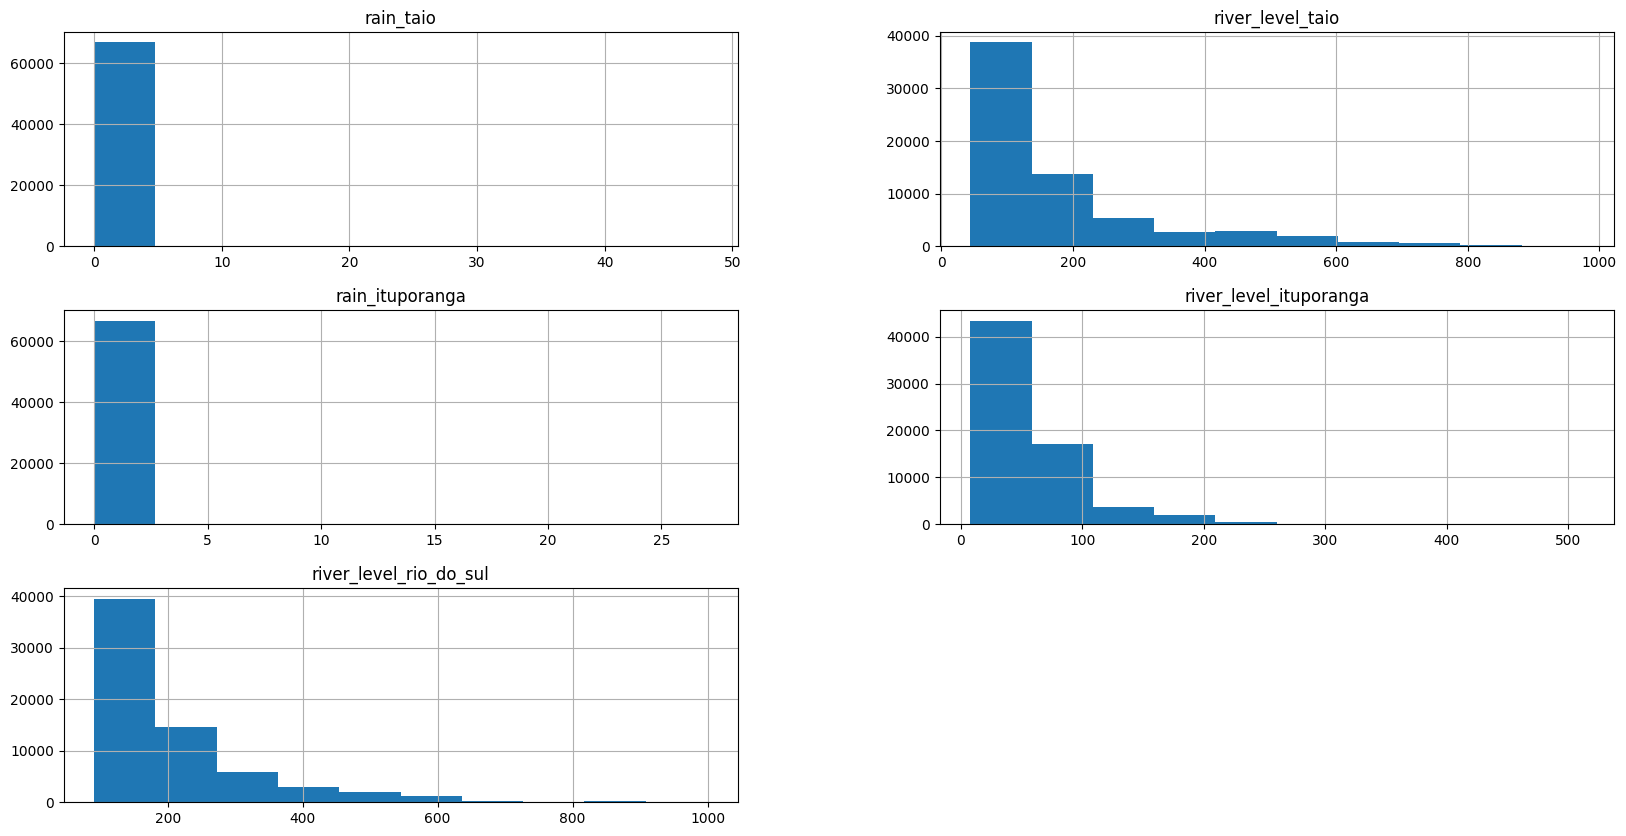

In [104]:
df.hist(figsize=(20, 10))

<AxesSubplot: >

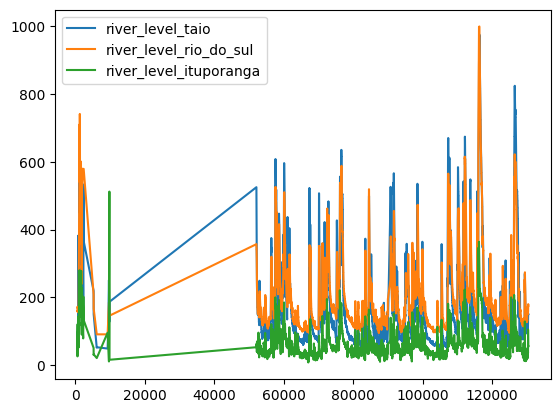

In [111]:
df_plot = df[['river_level_taio', 'river_level_rio_do_sul', 'river_level_ituporanga']]
df_plot.plot.line()

<AxesSubplot: >

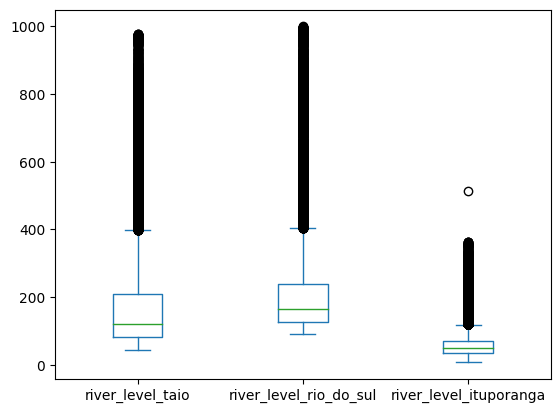

In [112]:
df_plot.plot.box()

In [137]:
# Teste utilizando divisão manual e ordenada, resultados semelhantes
train_size = 0.7
train_end = int(len(df)*train_size)

df_train = df[:train_end]
dfx_train = df_train[['river_level_taio', 'river_level_ituporanga', 'rain_ituporanga']]
dfy_train = df_train[['river_level_rio_do_sul']]

df_test = df[train_end:]
dfx_test = df_test[['river_level_taio', 'river_level_ituporanga', 'rain_ituporanga']]
dfy_test = df_test[['river_level_rio_do_sul']]

In [124]:
linear_regression = LinearRegression()

In [125]:
linear_regression.fit(dfx_train.values, dfy_train.values)

LinearRegression()

In [128]:
# Teste
linear_regression.predict([[573, 114, 0.8]])

array([[461.53421216]])

In [89]:
predict_values = linear_regression.predict(dfx_test.values)

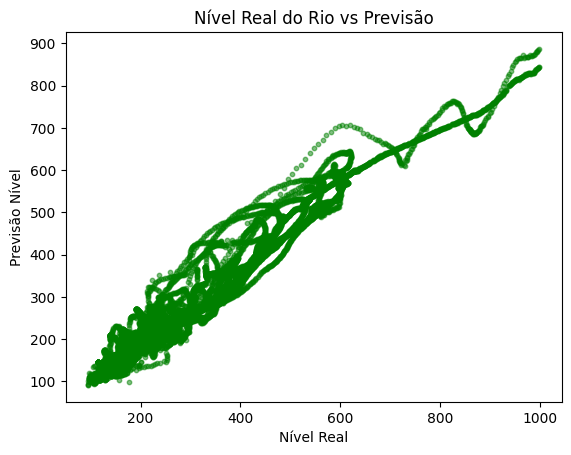

In [90]:
import matplotlib.pyplot as plt

plt.scatter(dfy_test.values, predict_values, s=10, c= ['green'], alpha=0.5)

plt.xlabel("Nível Real")
plt.ylabel("Previsão Nível")
plt.title("Nível Real do Rio vs Previsão")

plt.show()

In [121]:
from sklearn.metrics import r2_score 

R2 = r2_score(dfy_test.values,predict_values)
print("Valor do R² ", R2)

Valor do R²  0.9529568410826532


In [116]:
MAPE = np.mean(np.abs((dfy_test - predict_values) / dfy_test)) * 100

print("Valor do MAPE %.2f" %MAPE+"%")

Valor do MAPE 8.66%


/home/xavier/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [119]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(dfy_test,predict_values,squared=False)
RMSE = np.sqrt(RMSE) 
print("Valor do RMSE: %.2f" %RMSE)

Valor do RMSE: 5.95
